In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier , AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [32]:
#Load Data
df = pd.read_csv(r"/content/heart.csv")
print(df.columns.to_list())

#Select Features and target
X = df[['restecg', 'chol']]
Y = df['target']

['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


In [33]:
#Missing Data Handling
print("Missing Values per column:\n ",df.isnull().sum())

#If missing cols
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
  if df[col].isnull().sum() > 0:
    df[col].fillna(df[col].median(), inplace =True)

#For categorical columns
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
  df[col].fillna(df[col].mode()[0], inplace=True)

Missing Values per column:
  age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [34]:
#Split Dataset train/test
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=0
)

In [31]:
rf = RandomForestClassifier(n_estimators=100, criterion='entropy' , random_state=0)
rf.fit(X_train, Y_train)

#AdaBoost
ab =AdaBoostClassifier(n_estimators=100, learning_rate=1.0 ,random_state=0)
ab.fit(X_train, Y_train)




AdaBoostClassifier(n_estimators=100, random_state=0)

In [37]:
# Training accuracy
train_acc_rf = accuracy_score(Y_train, rf.predict(X_train))
train_acc_ab = accuracy_score(Y_train, ab.predict(X_train))

# Testing accuracy
test_acc_rf = accuracy_score(Y_test, rf.predict(X_test))
test_acc_ab = accuracy_score(Y_test, ab.predict(X_test))


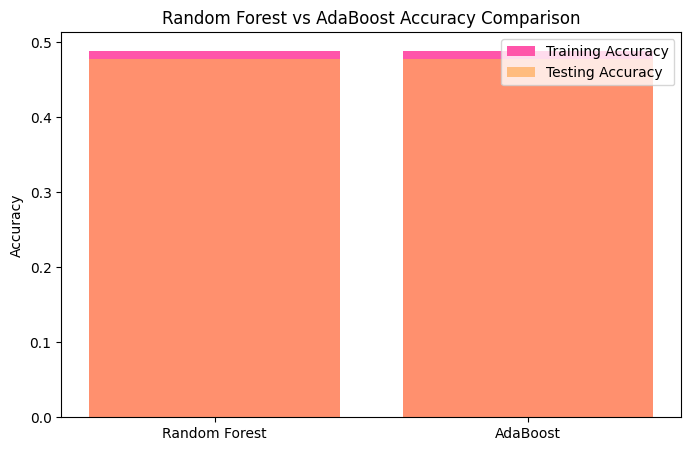

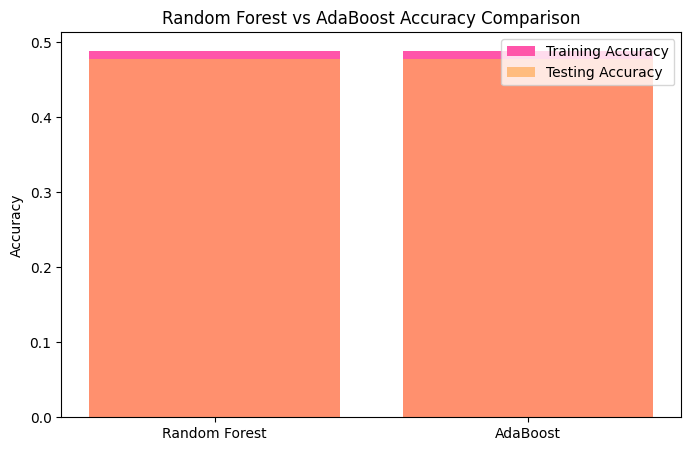

In [46]:

import seaborn as sns
colors = sns.color_palette("spring", 2)

models = ['Random Forest', 'AdaBoost']
train_acc = [train_acc_rf, train_acc_ab]
test_acc = [test_acc_rf, test_acc_ab]

plt.figure(figsize=(8,5))
plt.bar(models, train_acc, color=colors[0], label='Training Accuracy')
plt.bar(models, test_acc, color=colors[1], alpha=0.7, label='Testing Accuracy')
plt.title('Random Forest vs AdaBoost Accuracy Comparison')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



